In [4]:
import math

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Input: temperature (Celsius)
temperature = 2 

# Weight and bias (initial guess)
w = 0.2   # importance of temperature
b = -3    # bias: tendency to NOT buy by default

# Neuron calculation
z = w * temperature + b
probability = sigmoid(z)

print(f"Probability of buying ice cream: {probability:.2f}")


Probability of buying ice cream: 0.07


In [5]:
import math

# Activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Inputs
temperature = 30    # degrees Celsius
day = 1             # 1 = weekend, 0 = weekday
income = 50_000     # income level

# --- Hidden Layer ---
# Neuron 1
z1 = (0.2 * temperature) + (0.5 * day) + (0.00001 * income) - 3
h1 = sigmoid(z1)

# Neuron 2
z2 = (0.3 * temperature) + (0.1 * day) + (0.00002 * income) - 4
h2 = sigmoid(z2)

# --- Output Layer ---
z_out = (0.7 * h1) + (0.6 * h2) - 1
output = sigmoid(z_out)

print(f"Probability of buying ice cream: {output:.2f}")


Probability of buying ice cream: 0.57


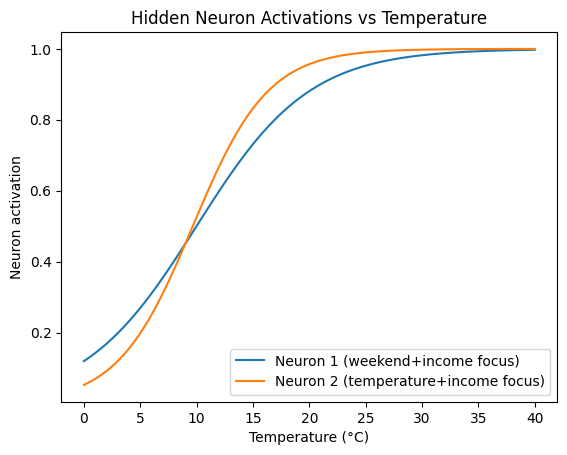

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def hidden_neurons(temp, day, income):
    # Neuron 1: cares more about weekend + income
    z1 = (0.2 * temp) + (0.5 * day) + (0.00001 * income) - 3
    h1 = sigmoid(z1)

    # Neuron 2: cares more about temperature + income
    z2 = (0.3 * temp) + (0.1 * day) + (0.00002 * income) - 4
    h2 = sigmoid(z2)

    return h1, h2

# Fix day=1 (weekend) and income=50k
temps = np.linspace(0, 40, 100)  # 0°C to 40°C
h1_vals, h2_vals = [], []

for t in temps:
    h1, h2 = hidden_neurons(t, 1, 50000)
    h1_vals.append(h1)
    h2_vals.append(h2)

plt.plot(temps, h1_vals, label="Neuron 1 (weekend+income focus)")
plt.plot(temps, h2_vals, label="Neuron 2 (temperature+income focus)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Neuron activation")
plt.legend()
plt.title("Hidden Neuron Activations vs Temperature")
plt.show()


In [7]:
# Test different input scenarios
scenarios = [
    ("Case A: Low income, weekday, cold day", 5, 0, 10000),
    ("Case B: High income, weekend, hot day", 30, 1, 80000),
    ("Case C: Medium income, weekend, cool day", 15, 1, 40000),
]

for label, temp, day, income in scenarios:
    h1, h2 = hidden_neurons(temp, day, income)
    print(f"{label} -> Neuron1: {h1:.2f}, Neuron2: {h2:.2f}")


Case A: Low income, weekday, cold day -> Neuron1: 0.13, Neuron2: 0.09
Case B: High income, weekend, hot day -> Neuron1: 0.99, Neuron2: 1.00
Case C: Medium income, weekend, cool day -> Neuron1: 0.71, Neuron2: 0.80


In [8]:
import numpy as np

# Sigmoid + derivative
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

# Training data: [temp, day, income_scaled] -> label
X = np.array([
    [30, 1, 0.8],  # hot, weekend, high income -> buy
    [5, 0, 0.2],   # cold, weekday, low income -> no buy
    [20, 1, 0.5],  # mild, weekend, medium -> maybe buy
    [10, 0, 0.3],  # cool, weekday, low income -> no buy
])
y = np.array([[1], [0], [1], [0]])

# Random weights
np.random.seed(1)
weights_input_hidden = np.random.rand(3, 2)  # 3 inputs -> 2 hidden
weights_hidden_output = np.random.rand(2, 1)

# Training loop
for epoch in range(5000):
    # Forward pass
    hidden = sigmoid(np.dot(X, weights_input_hidden))
    output = sigmoid(np.dot(hidden, weights_hidden_output))

    # Error
    error = y - output
    
    # Backpropagation
    d_output = error * sigmoid_derivative(output)
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden)
    
    # Update weights
    weights_hidden_output += hidden.T.dot(d_output) * 0.1
    weights_input_hidden += X.T.dot(d_hidden) * 0.1

# Final predictions
print("Trained outputs:\n", output)


Trained outputs:
 [[0.92926048]
 [0.09098282]
 [0.95281667]
 [0.03674569]]


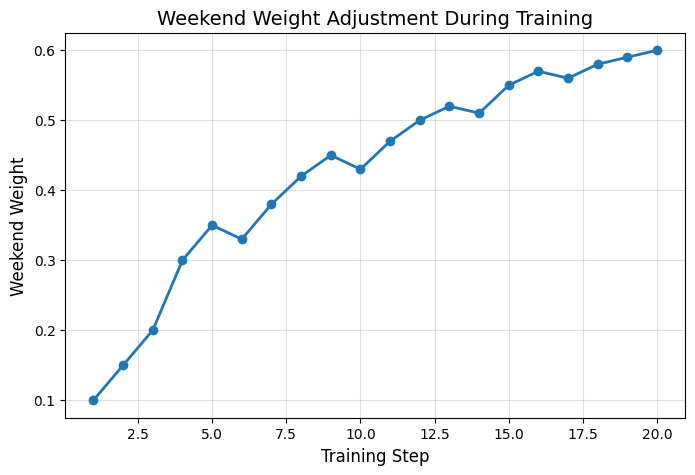

In [9]:
import matplotlib.pyplot as plt

# Simulated training steps for the "weekend" weight
steps = list(range(1, 21))
weights = [0.1, 0.15, 0.2, 0.3, 0.35, 0.33, 0.38, 0.42, 0.45, 0.43,
           0.47, 0.5, 0.52, 0.51, 0.55, 0.57, 0.56, 0.58, 0.59, 0.6]

plt.figure(figsize=(8,5))
plt.plot(steps, weights, marker='o', linestyle='-', linewidth=2)
plt.title("Weekend Weight Adjustment During Training", fontsize=14)
plt.xlabel("Training Step", fontsize=12)
plt.ylabel("Weekend Weight", fontsize=12)
plt.grid(True, alpha=0.4)
plt.show()


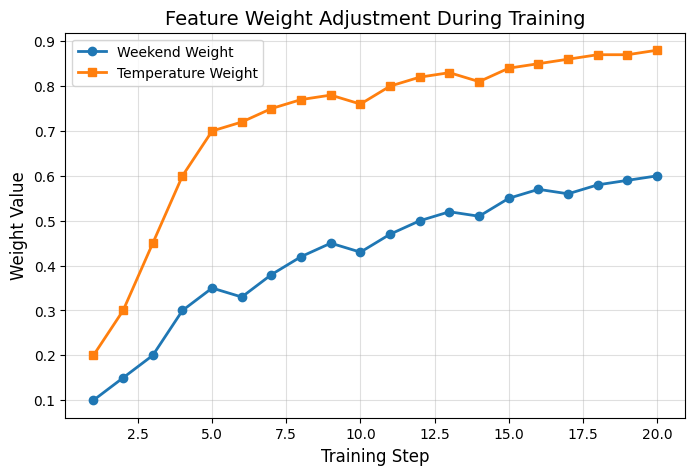

In [10]:
# Simulated training steps for both "weekend" and "temperature" weights
steps = list(range(1, 21))

weekend_weights = [0.1, 0.15, 0.2, 0.3, 0.35, 0.33, 0.38, 0.42, 0.45, 0.43,
                   0.47, 0.5, 0.52, 0.51, 0.55, 0.57, 0.56, 0.58, 0.59, 0.6]

temperature_weights = [0.2, 0.3, 0.45, 0.6, 0.7, 0.72, 0.75, 0.77, 0.78, 0.76,
                       0.8, 0.82, 0.83, 0.81, 0.84, 0.85, 0.86, 0.87, 0.87, 0.88]

plt.figure(figsize=(8,5))
plt.plot(steps, weekend_weights, marker='o', linestyle='-', linewidth=2, label="Weekend Weight")
plt.plot(steps, temperature_weights, marker='s', linestyle='-', linewidth=2, label="Temperature Weight")
plt.title("Feature Weight Adjustment During Training", fontsize=14)
plt.xlabel("Training Step", fontsize=12)
plt.ylabel("Weight Value", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()


In [18]:
import numpy as np
import pandas as pd

# Example input data: [temperature, weekend]
# Temperature: 1 = hot, 0 = cold
# Weekend: 1 = weekend, 0 = weekday
inputs = np.array([
    [1, 1],  # hot weekend
    [1, 0],  # hot weekday
    [0, 1],  # cold weekend
    [0, 0]   # cold weekday
])

# Final learned weights (from last training step)
temperature_w = 0.88
weekend_w = 0.60

# Bias term (threshold the network learns)
bias = -0.5  

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

weighted_sums = inputs @ np.array([temperature_w, weekend_w]) + bias
predictions = sigmoid(weighted_sums)

# Create and display DataFrame
df = pd.DataFrame(inputs, columns=["Temperature (Hot=1)", "Weekend (1)"])
df["Prediction Score"] = predictions.round(3)

print("\nIce Cream Network Predictions:")
print("------------------------------")
print(df.to_string(index=False))


Ice Cream Network Predictions:
------------------------------
 Temperature (Hot=1)  Weekend (1)  Prediction Score
                   1            1             0.727
                   1            0             0.594
                   0            1             0.525
                   0            0             0.378
